In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

Importing dataset

In [41]:
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [42]:
df=df.drop('id',axis=1)

In [43]:
df.shape

(193573, 10)

In [44]:
X=df.drop('price',axis=1)

In [45]:
y=df['price']

In [46]:
num_features=X.select_dtypes(exclude=['O']).columns
cat_features=X.select_dtypes(include=['O']).columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [47]:
X=preprocessor.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135501, 26)
(58072, 26)
(135501,)
(58072,)


In [66]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = np.mean((true - predicted) ** 2)
    rmse = np.sqrt(np.mean((true - predicted) ** 2))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square,mse

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = np.mean((true - predicted) ** 2)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 902926.4333
- Root Mean Squared Error: 950.2244
- Mean Absolute Error: 626.7535
- R2 Score: 0.9447
----------------------------------
Model performance for Test set
- Mean Squared Error: 903461.0565
- Root Mean Squared Error: 950.5057
- Mean Absolute Error: 625.7524
- R2 Score: 0.9441


Lasso
Model performance for Training set
- Mean Squared Error: 903887.8462
- Root Mean Squared Error: 950.7302
- Mean Absolute Error: 623.9807
- R2 Score: 0.9446
----------------------------------
Model performance for Test set
- Mean Squared Error: 904183.7841
- Root Mean Squared Error: 950.8858
- Mean Absolute Error: 623.1008
- R2 Score: 0.9440


Ridge
Model performance for Training set
- Mean Squared Error: 902900.3018
- Root Mean Squared Error: 950.2107
- Mean Absolute Error: 626.1003
- R2 Score: 0.9447
----------------------------------
Model performance for Test set
- Mean Squared Error: 903428.1164
- Root Mean Squared Erro

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.979068
6,XGBRegressor,0.978352
5,Random Forest Regressor,0.976586
3,K-Neighbors Regressor,0.969972
4,Decision Tree,0.956082
2,Ridge,0.944091
0,Linear Regression,0.944089
1,Lasso,0.944044
8,AdaBoost Regressor,0.866574


In [52]:
model=CatBoostRegressor(verbose=False)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([ 1447.34883037, 15113.29708099,   653.25918014, ...,
        1179.41348942,  5230.16024835,  6684.39057356])

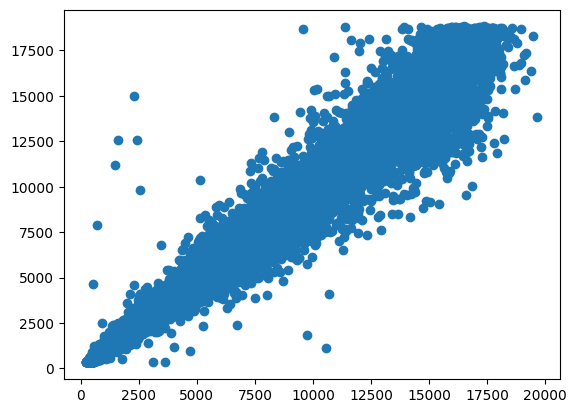

In [53]:
plt.scatter(y_pred,y_test)

<Axes: xlabel='price'>

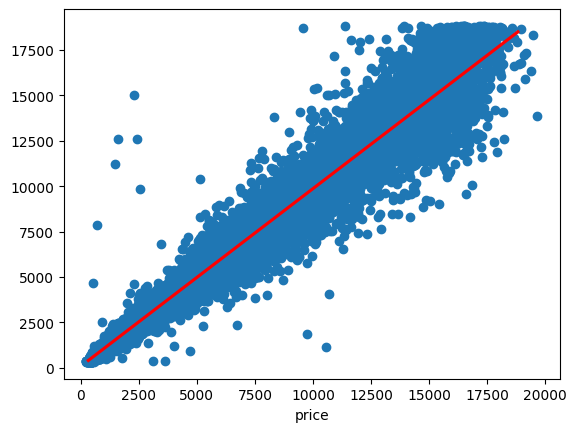

In [54]:
plt.scatter(y_pred,y_test)
sns.regplot(x=y_test, y=y_pred, ci=None, color='red', scatter = False )

In [55]:
predicted=pd.DataFrame({'y_pred':y_pred,'y_test':y_test,'difference':y_pred-y_test})
predicted

,y_pred,y_test,difference
14868,1447.348830,1355,92.348830
165613,15113.297081,14691,422.297081
96727,653.259180,844,-190.740820
145593,736.194738,707,29.194738
118689,5978.345435,5797,181.345435
...,...,...,...
39151,3115.066947,2974,141.066947
32423,1815.614383,1875,-59.385617
17876,1179.413489,967,212.413489
72938,5230.160248,5656,-425.839752


In [56]:
r2_score(y_test,y_pred)

0.9790683407737818

In [57]:
import joblib 
joblib.dump(model, 'model1.pkl')


['model1.pkl']

In [58]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [59]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [60]:
def predict_diamond(carat, cut, color, clarity, depth, table, x, y, z,preprocessor):
    input_data = pd.DataFrame({
        'carat': [carat],
        'cut': [cut],
        'color': [color],
        'clarity': [clarity],
        'depth': [depth],
        'table': [table],
        'x': [x],
        'y': [y],
        'z': [z],
    })

    input_data_transformed = preprocessor.transform(input_data)


    loaded_model = joblib.load('model1.pkl')



    y_pred = loaded_model.predict(input_data_transformed)

    return y_pred

In [61]:
prediction = predict_diamond(0.8, 'Premium', 'E', 'SI1', 62.3, 57, 5.85, 5.83, 3.61, preprocessor)

print(prediction)


[2969.151276]
